In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Самостоятельно выбранное изображение сделать полутоновым (перевести в формат grayscale) и построить его гистограмму.

In [ ]:
!curl https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/575A/production/_103426322_geert-weggen_split_00000157.jpg.webp > /content/squirrel.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19348  100 19348    0     0   143k      0 --:--:-- --:--:-- --:--:--  144k


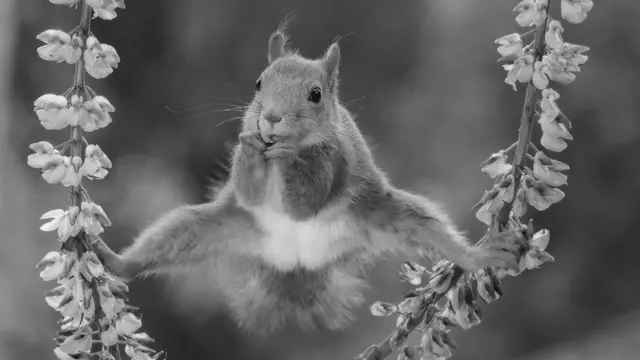

In [ ]:
squirrel = cv2.imread("/content/squirrel.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(squirrel)

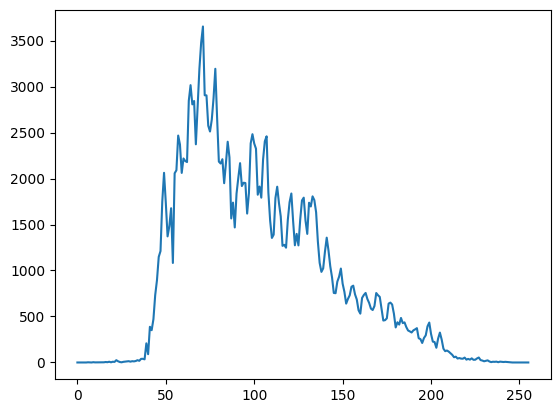

In [ ]:
hist = cv2.calcHist([squirrel], [0], None, [256], [0, 256])
plt.plot(hist)

Изображение открыть в формате BRG, разделить его на визуально отличимые части, для каждой из которых путем использования маски построить гистограммы каждого цветового канала. Сравнить гистограммы, сделать выводы.

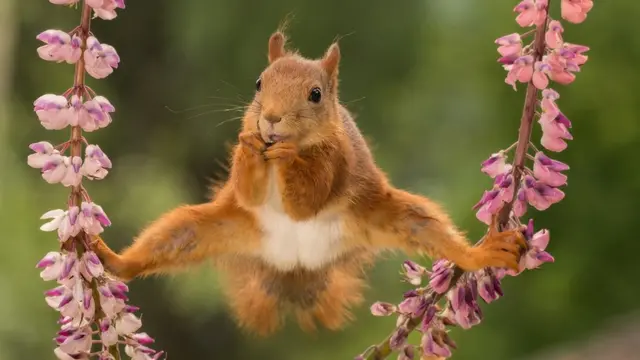

In [ ]:
squirrel = cv2.imread("/content/squirrel.jpg")
cv2_imshow(squirrel)

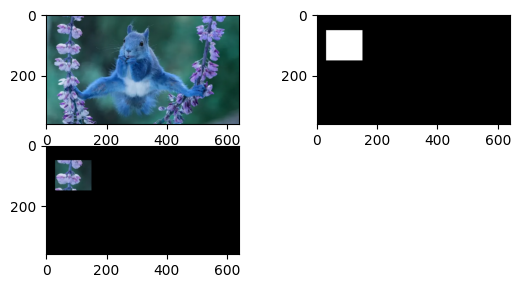

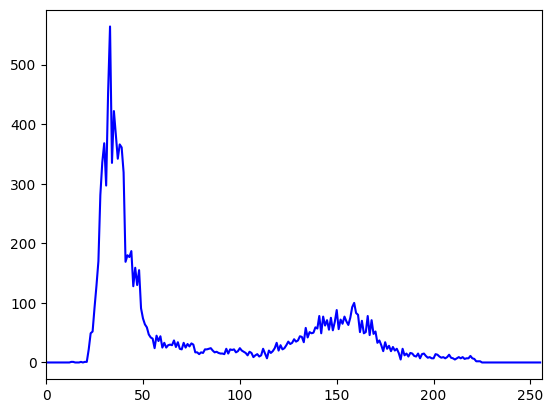

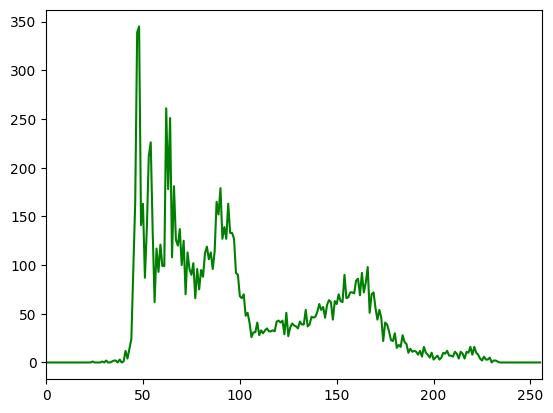

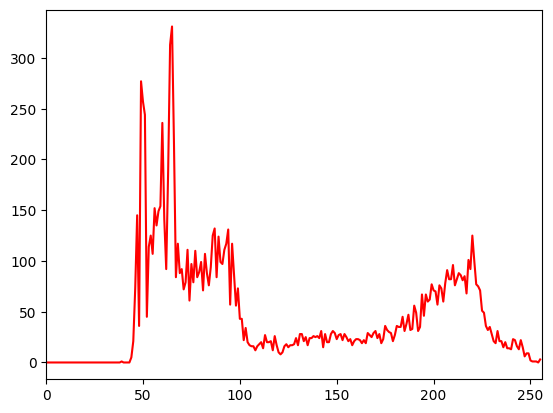

<Figure size 640x480 with 0 Axes>

In [ ]:
# выделим цветок
mask = np.zeros(squirrel.shape[:2], np.uint8)
mask[50:150, 30:150] = 255
masked_img = cv2.bitwise_and(squirrel, squirrel, mask=mask)

plt.subplot(321), plt.imshow(squirrel, 'gray')
plt.subplot(322), plt.imshow(mask, 'gray')
plt.subplot(323), plt.imshow(masked_img, 'gray')
plt.show()

color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv2.calcHist([squirrel], [i], mask, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
  plt.show()
  plt.clf()


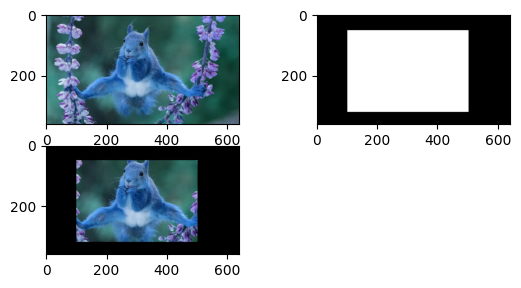

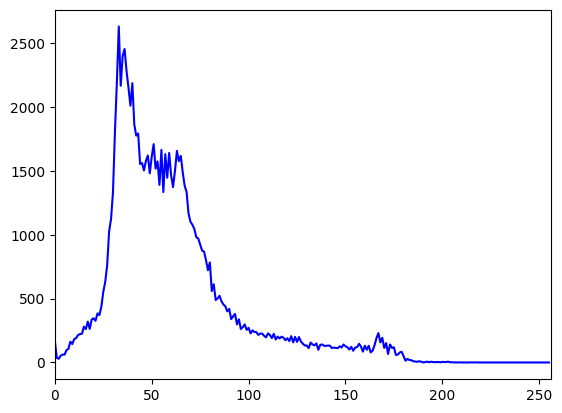

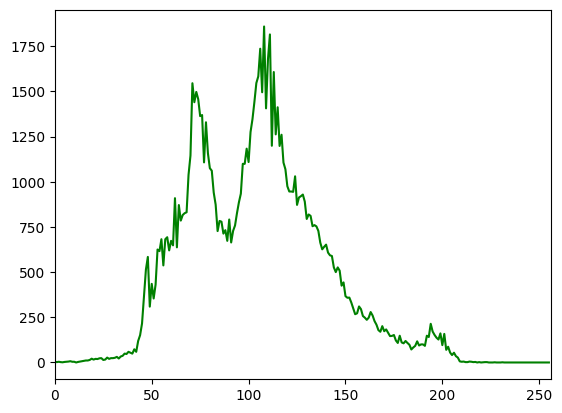

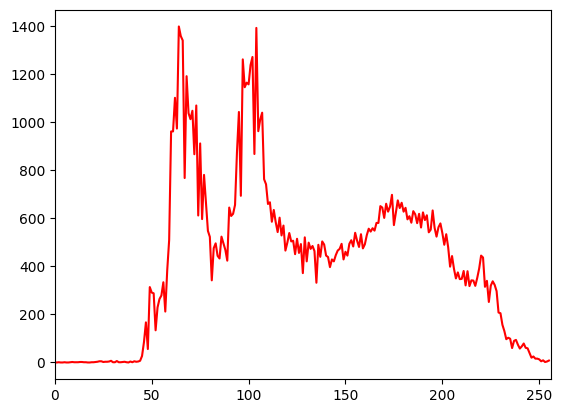

<Figure size 640x480 with 0 Axes>

In [ ]:
# и белку
mask = np.zeros(squirrel.shape[:2], np.uint8)
mask[50:320, 100:500] = 255
masked_img = cv2.bitwise_and(squirrel, squirrel, mask=mask)

plt.subplot(321), plt.imshow(squirrel, 'gray')
plt.subplot(322), plt.imshow(mask, 'gray')
plt.subplot(323), plt.imshow(masked_img, 'gray')
plt.show()

color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv2.calcHist([squirrel], [i], mask, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
  plt.show()
  plt.clf()

Выбрать затемненное или засвеченное изображение, применить к нему контрастирование гистограммы.

In [ ]:
!curl https://rugraphics.ru/wp-content/uploads/less_phot/ispravlenie-svetloy-fotografii1.jpg > /content/contrast.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26584  100 26584    0     0  26118      0  0:00:01  0:00:01 --:--:-- 26139


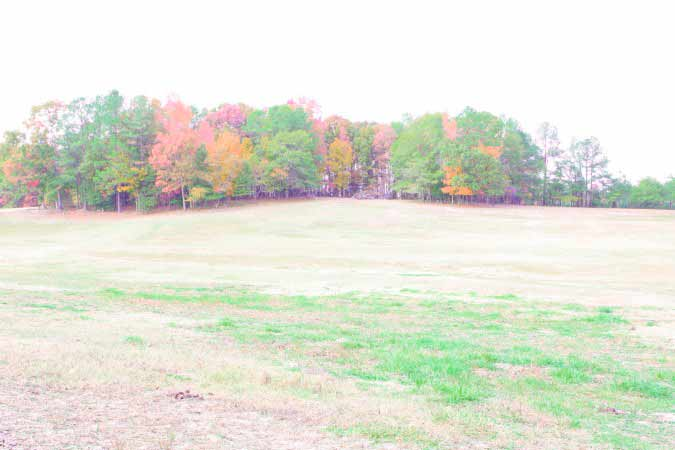

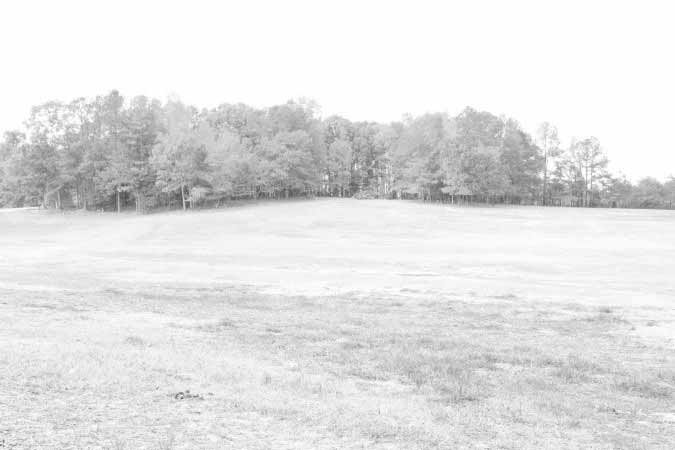

In [ ]:
contrast = cv2.imread("/content/contrast.jpg")
contrast_gray = cv2.imread("/content/contrast.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(contrast)
cv2_imshow(contrast_gray)

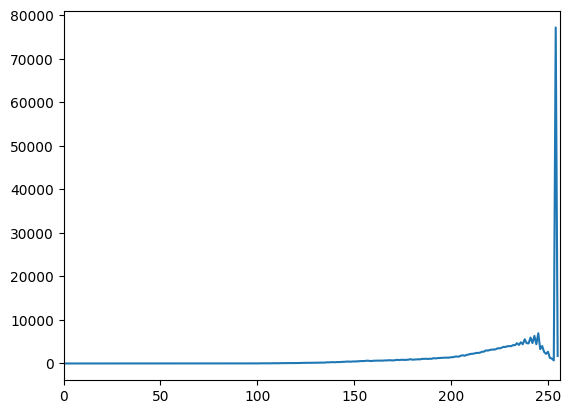

<Figure size 640x480 with 0 Axes>

In [ ]:
histr = cv2.calcHist([contrast_gray], [0], None, [256], [0,256])
plt.plot(histr)
plt.xlim([0,256])
plt.show()
plt.clf()

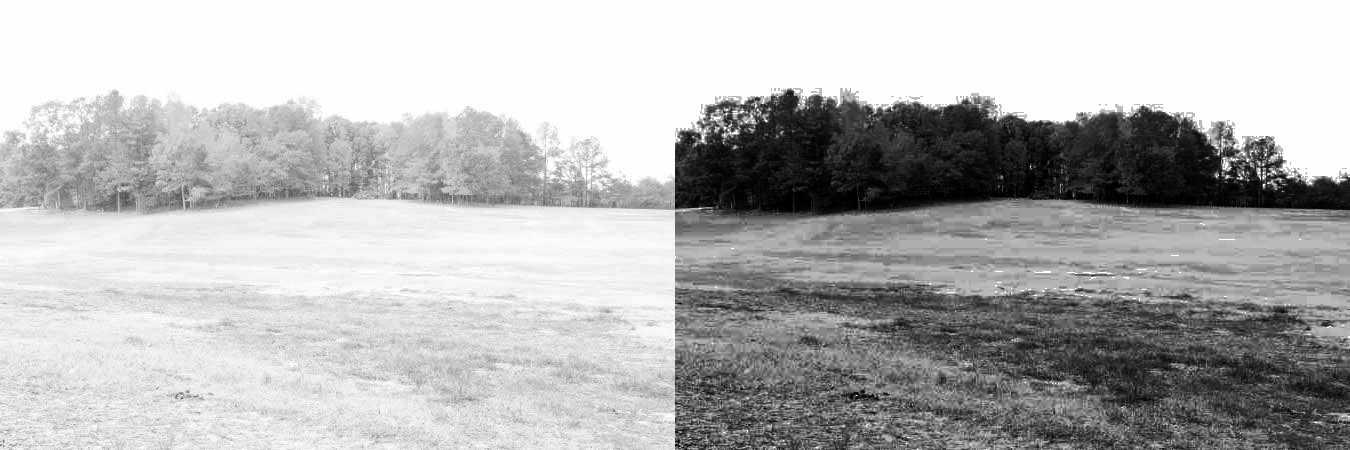

In [ ]:
restored_img = cv2.equalizeHist(contrast_gray)
res = np.hstack((contrast_gray, restored_img))
cv2_imshow(res)

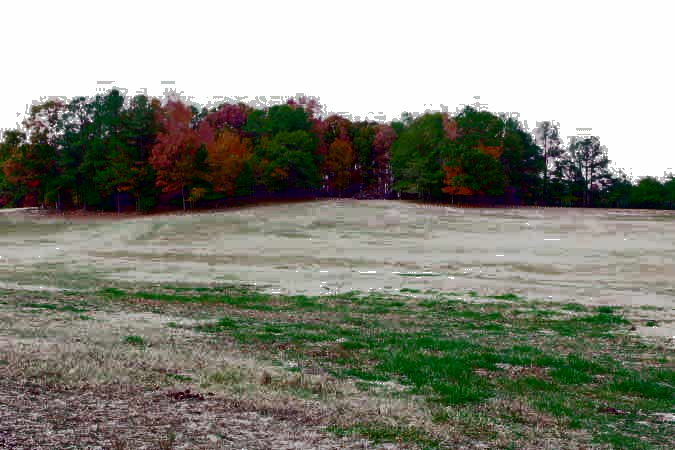

In [ ]:
contrast_yuv = cv2.cvtColor(contrast, cv2.COLOR_BGR2YUV)
# Выровнять по каналу Y
contrast_yuv[:,:,0] = cv2.equalizeHist(contrast_yuv[:,:,0])
# Перевести в BGR схему
contrast_output = cv2.cvtColor(contrast_yuv, cv2.COLOR_YUV2BGR)
cv2_imshow(contrast_output)

Произвести бинаризацию полутонового (grayscale) изображения, используя все допустимые значения параметра type метода cv2.threshold. Сравнить результаты.

In [ ]:
!curl https://icdn.lenta.ru/images/2024/10/30/17/20241030171229924/preview_117208e627957bb5924bbc20a07af785.jpg > /content/cat.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58668  100 58668    0     0  24676      0  0:00:02  0:00:02 --:--:-- 24681


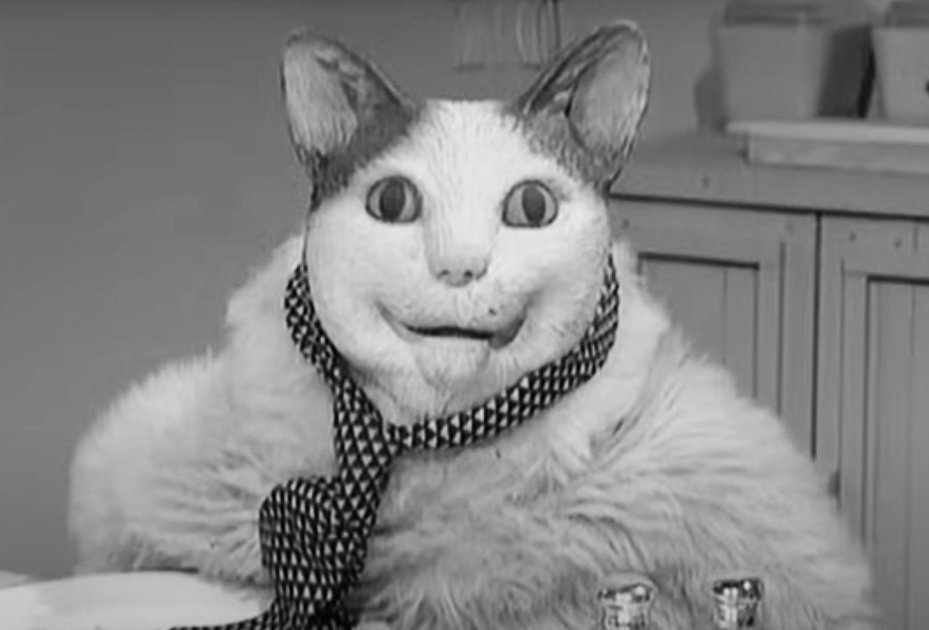

In [ ]:
cat = cv2.imread("/content/cat.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(cat)

In [ ]:
ret, thresh1 = cv2.threshold(cat, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(cat, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(cat, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(cat, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(cat, 127, 255, cv2.THRESH_TOZERO_INV)

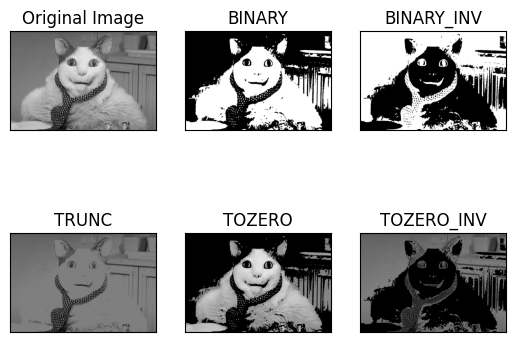

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [cat, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Произвести бинаризацию полутонового (grayscale) изображения, используя как минимум пять различных комбинаций значений параметров maxValue, blockSize, thresholdType метода adaptiveThreshold. Сделать выводы.

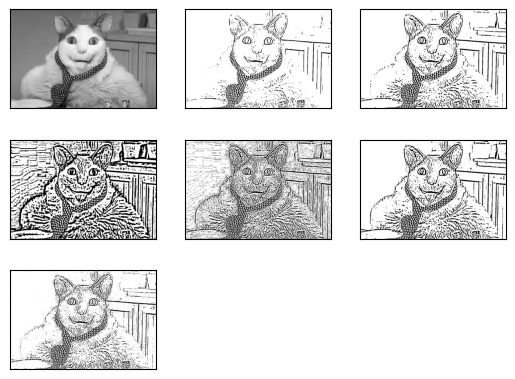

In [ ]:
cat1 = cv2.adaptiveThreshold(cat, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=11, C=5)
cat2 = cv2.adaptiveThreshold(cat, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=11, C=5)
cat6 = cv2.adaptiveThreshold(cat, 1, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=21, C=1)
cat3 = cv2.adaptiveThreshold(cat, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=5, C=1)
cat4 = cv2.adaptiveThreshold(cat, 180, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=19, C=3)
cat5 = cv2.adaptiveThreshold(cat, 180, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=5, C=2)

images = [cat, cat1, cat2, cat6, cat3, cat4, cat5]

for i in range(len(images)):
  plt.subplot(3, 3, i + 1);
  plt.imshow(images[i], 'gray')
  plt.xticks([]); plt.yticks([])
plt.show()


Выбрать бимодальное изображение, применить к нему фильтр Гаусса и метод бинаризации ОЦУ.

In [ ]:
!curl https://i.imgur.com/YE8DFir.png > /content/bimodal.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142k  100  142k    0     0   661k      0 --:--:-- --:--:-- --:--:--  661k


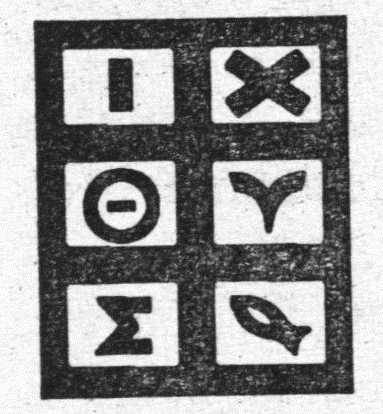

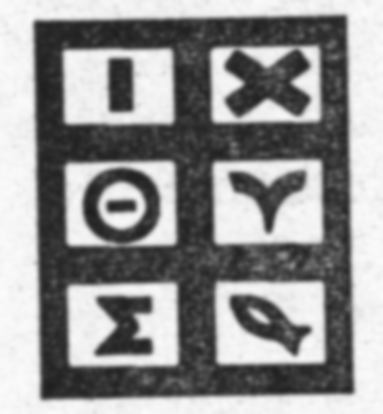

In [ ]:
bimodal_orig = cv2.imread("/content/bimodal.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(bimodal_orig)
bimodal = cv2.GaussianBlur(bimodal_orig, (11, 11), 0)
cv2_imshow(bimodal)


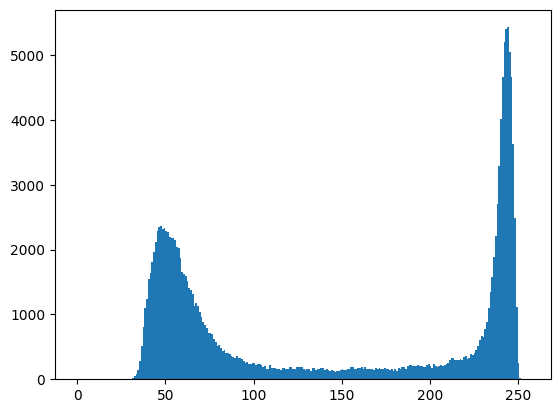

In [ ]:
hist = cv2.calcHist(bimodal, [0], None, [256], [0, 256])

plt.figure()
plt.hist(bimodal.ravel(), bins=256, range=[0, 256])
plt.show()

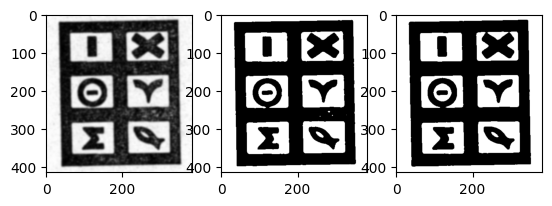

In [ ]:
_, pict = cv2.threshold(bimodal, 127, 255, cv2.THRESH_BINARY)
_, pict1 = cv2.threshold(bimodal, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

images = [bimodal, pict, pict1]

for i in range(3):
  plt.subplot(1, 3, i + 1)
  plt.imshow(images[i], 'gray')

plt.show()